In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
# %matplotlib notebook

In [2]:
ckpt_dir = 'checkpoints/'

In [3]:
res_pkl_fnames = []
for fname in os.listdir(ckpt_dir):
    if fname.endswith('res.pkl'):
        res_pkl_fnames.append(fname)
res_pkl_fnames.sort()
res_pkl_fnames

['special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.001,momentum=0.99_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.001,momentum=0.9_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.01,momentum=0.99_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.01,momentum=0.9_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.1,momentum=0.99_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.1,momentum=0.9_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=32,betas=0.9,0.99,lr=0.001,momentum=0.99_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=32,betas=0.9,0.99,lr=0.001,momentum=0.9_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=32,betas=0.9,0.99,lr=0.01,momentum=0.99_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=32,betas=0.9,0.99,lr=0.01,momentum=0.9_res.pkl',
 'special_fusenet,img_size=64,64,batch_size=4,betas=0.9,0.99,lr

In [4]:
res_pkl = []
for i,fname in enumerate(res_pkl_fnames):
    print(f'[I] - {i}) Load pkl file:')
    print(f'      {fname} ...')
    with open(os.path.join(ckpt_dir,fname), "rb") as fp:  # Unpickling
        res_pkl.append(pkl.load(fp))
    print(f'      ... Done.')

[I] - 0) Load pkl file:
      special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.001,momentum=0.99_res.pkl ...
      ... Done.
[I] - 1) Load pkl file:
      special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.001,momentum=0.9_res.pkl ...
      ... Done.
[I] - 2) Load pkl file:
      special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.01,momentum=0.99_res.pkl ...
      ... Done.
[I] - 3) Load pkl file:
      special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.01,momentum=0.9_res.pkl ...
      ... Done.
[I] - 4) Load pkl file:
      special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.1,momentum=0.99_res.pkl ...
      ... Done.
[I] - 5) Load pkl file:
      special_fusenet,img_size=64,64,batch_size=16,betas=0.9,0.99,lr=0.1,momentum=0.9_res.pkl ...
      ... Done.
[I] - 6) Load pkl file:
      special_fusenet,img_size=64,64,batch_size=32,betas=0.9,0.99,lr=0.001,momentum=0.99_res.pkl ...
      ... Done.
[I] - 7) Load pkl file

FitResult Consist of List[List]

In [5]:
print(res_pkl[0].num_epochs)
print(len(res_pkl[0].train_loss))
print(len(res_pkl[0].train_loss[0]))

217
217
64


In [6]:
res_train_losses = []
res_test_losses  = []
for i,res in enumerate(res_pkl):
    res_train_losses.append([sum(r)/len(r) for r in res.train_loss])
    res_test_losses.append([sum(r)/len(r) for r in res.test_loss])

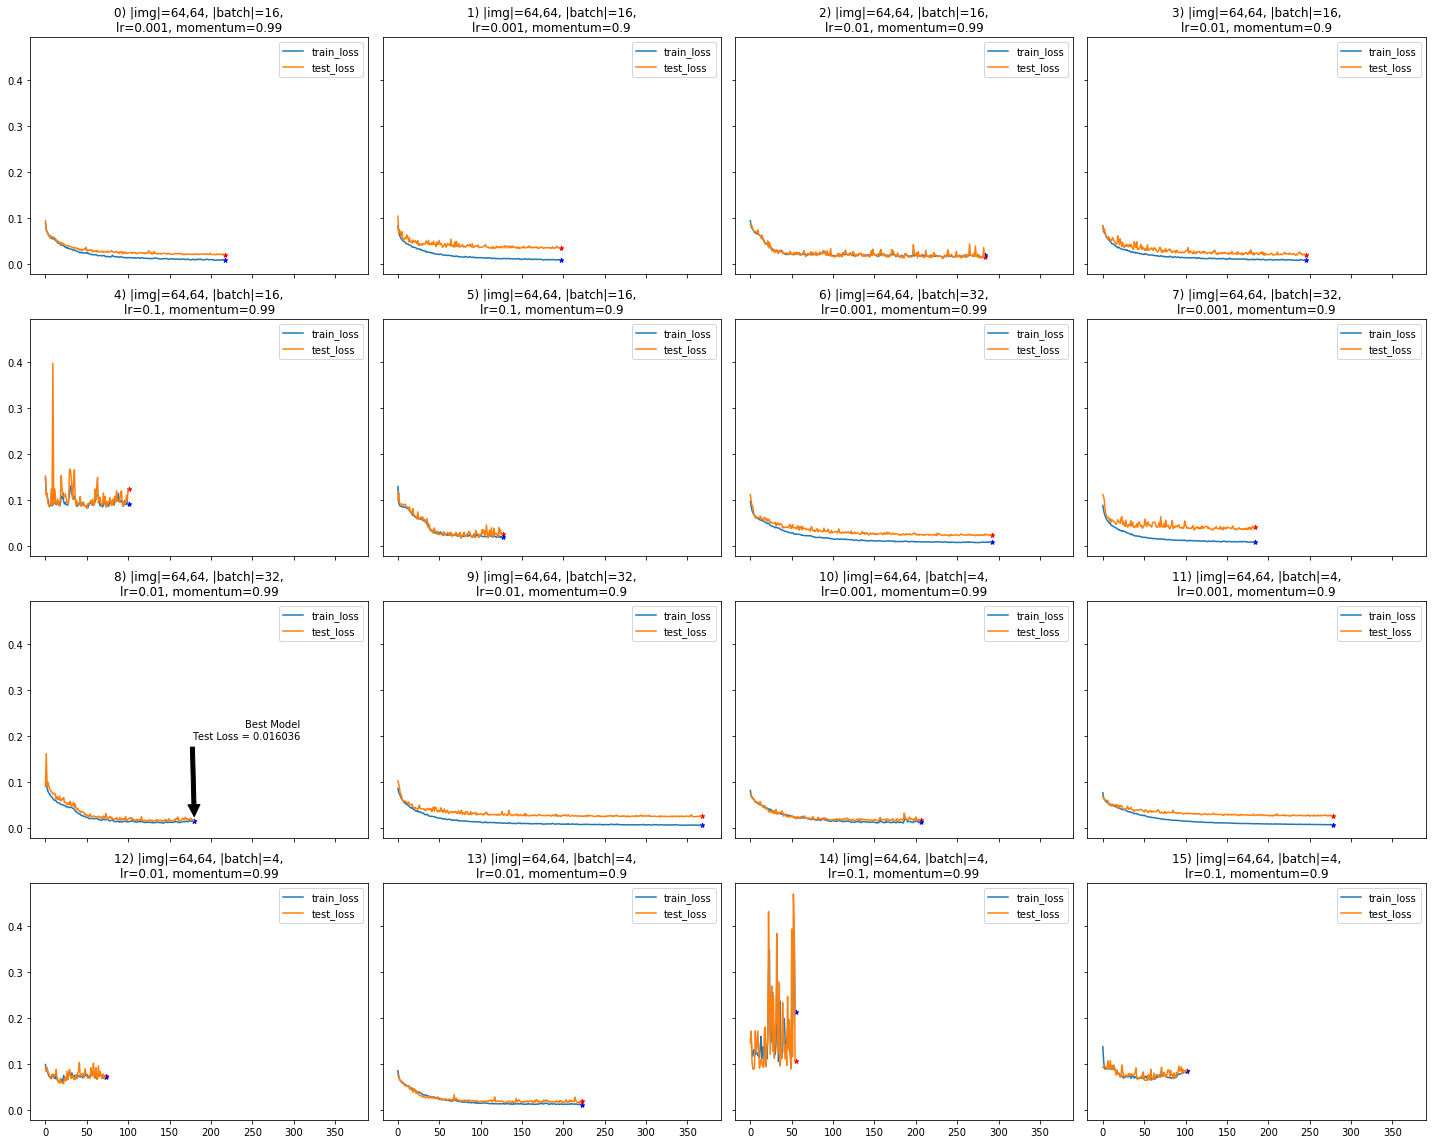

special_fusenet,img_size=64,64,batch_size=32,betas=0.9,0.99,lr=0.01,momentum=0.99_res.pkl


In [7]:
best_test_loss = res_test_losses[0][-1]
best_i         = 0
best_fname     = res_pkl_fnames[0]

rows = int(np.floor(np.sqrt(len(res_pkl_fnames))))
cols = int(np.ceil(np.sqrt(len(res_pkl_fnames))))

fig, axes = plt.subplots(rows,cols, figsize=(20,16), sharex=True, sharey=True)

for (i, axi), res_train, res_test, res_fname in zip(enumerate(axes.flat),
                                                    res_train_losses, res_test_losses, res_pkl_fnames):
    axi.plot(res_train, label='train_loss')
    axi.plot(res_test,  label='test_loss')
    axi.legend()
    title_args = re.search( r'^special_fusenet,img_size=(\d+,\d+),batch_size=(\d+),betas=(\d+.\d+,\d+.\d+),lr=(\d+.\d+),momentum=(\d+.\d+)+_res.pkl', res_fname)
    if not title_args:
        continue
    img_size   = title_args.group(1)
    batch_size = title_args.group(2)
    betas      = title_args.group(3)
    lr         = title_args.group(4)
    momentum   = title_args.group(5)
    axi.set_title(f'{i}) |img|={img_size}, |batch|={batch_size},\nlr={lr}, momentum={momentum}')
    
    if res_test[-1] < best_test_loss:
        best_test_loss = res_test[-1]
        best_i = i
        best_fname = res_fname
    
    axi.scatter(x=len(res_test), y=res_test[-1], c='r', marker='*', s=20)
    axi.scatter(x=len(res_train), y=res_train[-1], c='b', marker='*', s=20)

axes.flat[best_i].annotate("Best Model\nTest Loss = {0:0=2f}".format(best_test_loss),
                          xy=(len(res_test_losses[best_i]), best_test_loss), xycoords='data',
                          xytext=(0.8, 0.5), textcoords='axes fraction',
                          arrowprops=dict(facecolor='black', shrink=0.05),
                          horizontalalignment='right', verticalalignment='top')

        
plt.tight_layout()
plt.show()
print(best_fname)